In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam 
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/final.csv')

In [4]:
#簡單的
x, y = df[df.columns[2:]], df[df.columns[1]]
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

x_traval, x_test, y_traval, y_test = train_test_split(x, y, test_size=0.2, random_state = 1, stratify= y)
x_train, x_val, y_train, y_val = train_test_split(x_traval, y_traval, test_size=0.2, random_state = 1, stratify= y_traval)

In [5]:
#reshape
x_train_r = np.array(x_train).reshape(-1,100,100)
x_test_r = np.array(x_test).reshape(-1,100,100)
x_val_r = np.array(x_val).reshape(-1,100,100)

# 轉換色彩 0~255 資料為 0~1
x_train_r = x_train_r.astype('float32')
x_val_r = x_val_r.astype('float32')
x_test_r = x_test_r.astype('float32')

x_train_r /= 255
x_val_r /= 255
x_test_r /= 255

# y 值轉成 one-hot encoding
y_train_e = keras.utils.to_categorical(y_train, num_classes=12, dtype='float32') 
y_test_e = keras.utils.to_categorical(y_test, num_classes=12, dtype='float32')
y_val_e = keras.utils.to_categorical(y_val, num_classes=12, dtype='float32')

In [ ]:
y_train_e

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [6]:
# 定義分類數量 每個系列
num_classes = 12

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 1), activation='relu')) #32 is no. of filters and kernel size is 3*3. ReLU is activation layer
# model.add(MaxPooling2D(pool_size=(2,2))) #add Max pooling layer with kernel size 2*2 
# model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu')) 
# model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) 
# adam = Adam(lr=1e-4)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train_r, y_train_e, validation_data=(x_val_r, y_val_e), epochs=50, batch_size=32)

#Evaluating model in keras
score = model.evaluate(x_test_r, y_test_e, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# model.fit_generator(training_set, epochs = 2, validation_data = test_set, verbose = 1)
# score = model.evaluate_generator(test_set)

#model.save('my_model.h5', include_optimizer=False)
#如果你對這個模型滿意，想要保留之後使用的話，可以這樣設定儲存參數，那麼優化器的狀態不會被保存下來，可以節省不少體積，減少的體積量依使用優化器的不同而定，使用adam的話，這麼做是很有感的，如果你是之前中斷訓練，且有意後續載入繼續進行訓練的話，建議可以先不做。

Epoch 1/50
16/16 [==============================] - 12s 118ms/step - loss: 3.1804 - acc: 0.1543 - val_loss: 2.3068 - val_acc: 0.1953
Epoch 2/50
16/16 [==============================] - 1s 87ms/step - loss: 2.3040 - acc: 0.1953 - val_loss: 2.2928 - val_acc: 0.1953
Epoch 3/50
16/16 [==============================] - 1s 82ms/step - loss: 2.3229 - acc: 0.1953 - val_loss: 2.3204 - val_acc: 0.1953
Epoch 4/50
16/16 [==============================] - 1s 84ms/step - loss: 2.3184 - acc: 0.1914 - val_loss: 2.3571 - val_acc: 0.2031
Epoch 5/50
16/16 [==============================] - 1s 86ms/step - loss: 2.2985 - acc: 0.1992 - val_loss: 2.2975 - val_acc: 0.2031
Epoch 6/50
16/16 [==============================] - 1s 87ms/step - loss: 2.2831 - acc: 0.2051 - val_loss: 2.2802 - val_acc: 0.2031
Epoch 7/50
16/16 [==============================] - 1s 83ms/step - loss: 2.2696 - acc: 0.2480 - val_loss: 2.2771 - val_acc: 0.2734
Epoch 8/50
16/16 [==============================] - 1s 81ms/step - loss: 2.1972 -

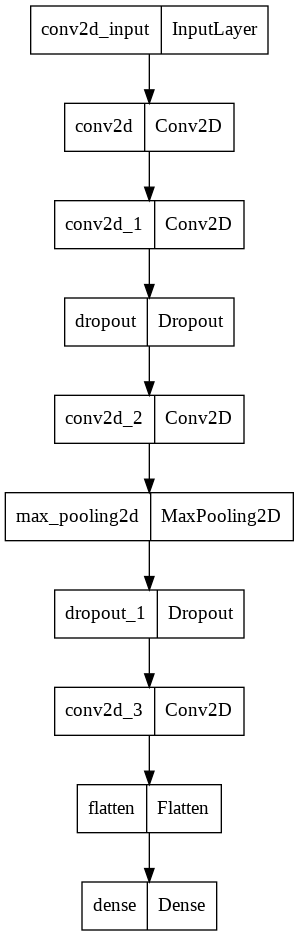

In [7]:
keras.utils.plot_model(model, to_file='model.png')

<Figure size 576x432 with 0 Axes>

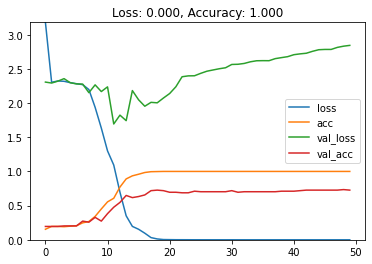

In [8]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))
    
plot_loss_accuracy(history)

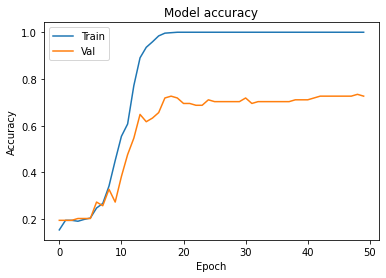

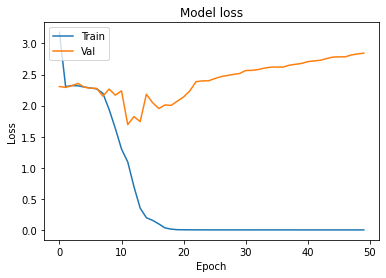

In [9]:
# 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [10]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 96, 96, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 128)       0         
                                                        

In [11]:
!pip install pyyaml h5py  # Required to save models in HDF5 format
model.save('/content/drive/MyDrive/Colab Notebooks/project/model_forweb.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/project/model_weights_forweb.h5')

# 將模型匯出至 JSON（不含參數）
# json_string = model.to_json()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
